In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np

dirname=os.path.dirname(os.path.abspath('__file__'))
filename=os.path.join(dirname,'./data/recipesData.json')
df=pd.read_json(filename)

In [107]:
df.keys()

Index(['_id', 'ratingData', 'name', 'datePublished', 'description',
       'recipeYield', 'recipeIngredient', 'recipeInstructions',
       'recipeCategory', 'nutrition', 'category', 'Tatcategory', 'RecId',
       'link', 'rating', 'img', 'prepTimeVal', 'cookTimeval', 'totalTimeVal',
       'ratingCount', 'bestRating', 'worstRating', 'video'],
      dtype='object')

In [108]:
df.head()

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.40,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.46,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.47,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.33,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.28,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN


In [109]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,"39,040.00","39,040.00","39,040.00","39,040.00","39,040.00","39,040.00","39,040.00","39,040.00"
mean,"112,895.67",4.37,17.22,38.98,116.66,143.39,5.00,1.00
std,"95,889.03",0.36,157.30,80.25,647.06,475.47,0.00,0.00
min,"6,663.00",1.32,0.00,0.00,0.00,10.00,5.00,1.00
25%,"19,107.50",4.20,10.00,5.00,24.00,20.00,5.00,1.00
50%,"78,021.50",4.45,15.00,20.00,45.00,41.00,5.00,1.00
75%,"220,546.75",4.62,20.00,40.00,85.00,106.00,5.00,1.00
max,"282,261.00",5.00,"30,240.00","3,000.00","30,310.00","19,033.00",5.00,1.00


In [110]:
from scipy import stats
df = df.loc[(df['totalTimeVal'] >= 2) & (df['totalTimeVal'] <= 1000)]

In [111]:
df.describe()

,RecId,rating,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating
count,"34,408.00","34,408.00","34,408.00","34,408.00","34,408.00","34,408.00","34,408.00","34,408.00"
mean,"123,903.71",4.38,17.84,42.73,91.14,148.47,5.00,1.00
std,"94,897.90",0.36,19.65,75.49,123.95,497.43,0.00,0.00
min,"6,664.00",1.32,0.00,0.00,2.00,10.00,5.00,1.00
25%,"23,733.75",4.21,10.00,10.00,30.00,19.00,5.00,1.00
50%,"99,463.50",4.46,15.00,22.00,50.00,41.00,5.00,1.00
75%,"222,928.25",4.63,20.00,45.00,90.00,107.00,5.00,1.00
max,"282,261.00",5.00,900.00,840.00,"1,000.00","19,033.00",5.00,1.00


In [112]:
df['recipeCategory']

0        [Appetizers and Snack Recipes, Dips and Spread...
1        [Appetizers and Snack Recipes, Dips and Spread...
2                        [Side Dish, Vegetables, Eggplant]
3        [Appetizers and Snack Recipes, Dips and Spread...
4        [Appetizers and Snack Recipes, Dips and Spread...
                               ...                        
39035                [Main Dish Recipes, Meatball Recipes]
39036    [Main Dish Recipes, Meatloaf Recipes, Beef Mea...
39037                     [Main Dish Recipes, Rib Recipes]
39038     [World Cuisine Recipes, Latin American, Mexican]
39039    [Main Dish Recipes, Meatloaf Recipes, Beef Mea...
Name: recipeCategory, Length: 34408, dtype: object

In [113]:
df

,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.40,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.46,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.47,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.33,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.28,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39035,{'$oid': '5fc519d9d38145ece7ebfc34'},"[{'rating': 5, 'count': 314, 'percentage': 61}...",Waikiki Meatballs,2020-03-05T04:56:32.000Z,"Beef meatballs flavored with ground ginger, si...",6 servings,"[1 ½ pounds ground beef, ⅔ cup crushed saltine...","[{'text': 'In a large bowl, combine ground bee...","[Main Dish Recipes, Meatball Recipes]","{'calories': '441.9 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/25197/waikik...,4.44,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,25,45,512,5,1,NaN
39036,{'$oid': '5fc519d9d38145ece7ebfc35'},"[{'rating': 5, 'count': 85, 'percentage': 40},...",Wonderful Meatloaf,2000-01-12T22:38:46.000Z,This is my all time favorite recipe for meatlo...,4 servings,"[1 pound ground beef, ¾ cup cooked rice, 1 tab...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Main Dish Recipes, Meatloaf Recipes, Beef Mea...","{'calories': '441.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/16353/wonder...,3.99,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,45,50,211,

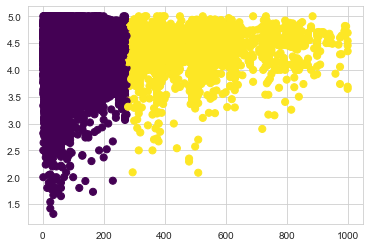

In [114]:
time_df=df[["rating","totalTimeVal"]]


kmeans = KMeans(n_clusters=2, random_state=0).fit(time_df)
y_kmeans = kmeans.predict(time_df)
# centers = kmeans.cluster_centers_
plt.scatter(time_df.iloc[:, 1], time_df.iloc[:,0], c=y_kmeans, s=50, cmap="viridis")
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#y_kmeans

In [115]:


df['instructionsCount'] = df['recipeInstructions'].apply(lambda x: len(x))
df['recipeCount'] = df['recipeIngredient'].apply(lambda x: len(x))

# create a new column for percentiles
df['pct_totalTimeVal'] = df['totalTimeVal'].rank(pct=True).apply(lambda x: float(x))
df['pct_recipeCount'] = df['recipeCount'].rank(pct=True).apply(lambda x: float(x))
df['pct_instructionsCount'] = df['instructionsCount'].rank(pct=True).apply(lambda x: float(x))
# create a new column for difficulty
df['difficulty'] = df['pct_instructionsCount'] * df['pct_recipeCount'] * df['pct_totalTimeVal']

In [116]:
pd.options.display.float_format = '{:20,.2f}'.format
df.round(4)
df['difficulty'].sort_values(ascending=True)
df['difficulty'].describe()

difficultyDict = {}
for index, row in df.iterrows(): 
    difficultyDict[row.RecId] = row.difficulty

In [117]:
filename=os.path.join(dirname,'./data/ratings.csv')
dfUsersRatings=pd.read_csv(filename)

In [118]:
filteredRatingsDf = dfUsersRatings[dfUsersRatings.recipeId.isin(df.RecId)]

In [119]:
filteredRatingsDf['difficulty'] = filteredRatingsDf['recipeId'].map(difficultyDict)


In [120]:
filteredRatingsDf

,userId,rating,recipeId,difficulty
0,3,5,23945,0.05
1,6,4,23945,0.05
5,14,5,161178,0.00
6,15,5,161178,0.00
7,17,5,161178,0.00
...,...,...,...,...
1923452,153110,5,16293,0.27
1923453,99619,5,16293,0.27
1923454,7227,3,16293,0.27
1923455,362781,5,16293,0.27


In [121]:
filteredRatingsByUser = filteredRatingsDf.groupby('userId').agg({'rating':'mean','recipeId': 'count', 'difficulty': 'mean'})
filteredRatingsByUser.rename(columns={'recipeId': 'recipes_count'}, inplace=True)


In [122]:

filteredRatingsByUser.reset_index(inplace=True)


In [123]:
filteredRatingsByUser['difficulty'].describe()


count              71,574.00
mean                    0.17
std                     0.06
min                     0.00
25%                     0.13
50%                     0.16
75%                     0.20
max                     0.59
Name: difficulty, dtype: float64

In [124]:

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
filteredRatingsByUser['difficulty'] = NormalizeData(filteredRatingsByUser['difficulty'])

In [125]:
filteredRatingsByUser['difficulty'].describe()

count              71,574.00
mean                    0.28
std                     0.09
min                     0.00
25%                     0.22
50%                     0.27
75%                     0.34
max                     1.00
Name: difficulty, dtype: float64

In [126]:
filteredRatingsByUser['difficulty']=np.where(filteredRatingsByUser['difficulty'] > 0.27 , 3, filteredRatingsByUser['difficulty'])
filteredRatingsByUser['difficulty']=np.where((filteredRatingsByUser['difficulty'] > 0.22) & (filteredRatingsByUser['difficulty'] < 3) , 2, filteredRatingsByUser['difficulty'])
filteredRatingsByUser['difficulty']=np.where(filteredRatingsByUser['difficulty'] < 2, 1, filteredRatingsByUser['difficulty'])
difficultyDict = {1: 'Easy', 2: 'Medium', 3: 'Hard'}

<AxesSubplot:>

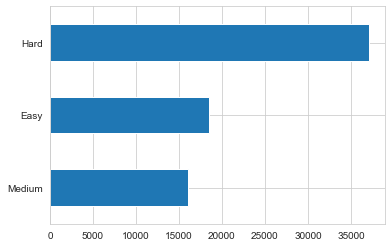

In [127]:
filteredRatingsByUser['difficulty'] = filteredRatingsByUser['difficulty'].map(difficultyDict)
filteredRatingsByUser.difficulty.value_counts().sort_values().plot(kind = 'barh')

In [141]:
x = filteredRatingsByUser.iloc[:, 2:3]
y = filteredRatingsByUser.iloc[:, 3:4]
x.head(10)
# y.head(10)

,recipes_count
0,136
1,241
2,26
3,57
4,13
5,2206
6,73
7,38
8,12
9,264


In [129]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=200)
knn.fit(x, y)


KNeighborsClassifier(n_neighbors=200)

In [130]:
filteredRatingsByUser.head(10)

,userId,rating,recipes_count,difficulty
0,3,4.35,136,Medium
1,6,4.17,241,Medium
2,8,4.46,26,Easy
3,11,4.33,57,Easy
4,13,3.31,13,Hard
5,14,4.17,2206,Easy
6,15,4.41,73,Easy
7,17,4.89,38,Hard
8,18,4.42,12,Medium
9,20,3.79,264,Medium


In [131]:
dfOnlyParameters = filteredRatingsByUser.iloc[:,1:4]
dfOnlyParameters.head(10)

,rating,recipes_count,difficulty
0,4.35,136,Medium
1,4.17,241,Medium
2,4.46,26,Easy
3,4.33,57,Easy
4,3.31,13,Hard
5,4.17,2206,Easy
6,4.41,73,Easy
7,4.89,38,Hard
8,4.42,12,Medium
9,3.79,264,Medium


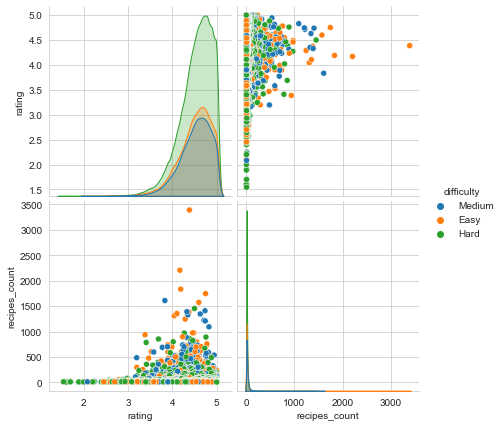

In [132]:
import seaborn as sns
plt.close();
sns.set_style('whitegrid');
sns.pairplot(dfOnlyParameters, hue='difficulty', height=3);
plt.show()


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [147]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[ 687 2768  260]
 [1357 5456  540]
 [ 586 2386  275]]
Classification Report:
              precision    recall  f1-score   support

        Easy       0.26      0.18      0.22      3715
        Hard       0.51      0.74      0.61      7353
      Medium       0.26      0.08      0.13      3247

    accuracy                           0.45     14315
   macro avg       0.34      0.34      0.32     14315
weighted avg       0.39      0.45      0.40     14315

Accuracy: 0.4483409011526371


<h1>section 5</h1>

In [135]:
categoriesPath=os.path.join(dirname,'./data/topCategories.json')
dfCategories=pd.read_json(categoriesPath)
dfCategories=dfCategories['name']

In [136]:
dfCategories.head(10)

0                   Dessert Recipes
1                         Side Dish
2             World Cuisine Recipes
3      Appetizers and Snack Recipes
4                 Main Dish Recipes
5          Meat and Poultry Recipes
6    Soups, Stews and Chili Recipes
7                             Salad
8                        Vegetables
9     Sauces and Condiments Recipes
Name: name, dtype: object

In [137]:
dfCategoriesGroupBy = dict.fromkeys(dfCategories, [])
dfAllRecipies = []
for index, category in dfCategories.iteritems():
    for index2, recipe in df.iterrows():
        if(category in recipe['recipeCategory']):
            dfCategoriesGroupBy[category] = dfCategoriesGroupBy[category] + recipe['recipeIngredient']

In [138]:
for key in dfCategoriesGroupBy:
    dfCategoriesGroupBy[key] = ' '.join(dfCategoriesGroupBy[key])
    dfAllRecipies.append(dfCategoriesGroupBy[key])

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
cv = CountVectorizer(analyzer= 'word', stop_words='english',max_features=20000, max_df=0.50)

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(dfAllRecipies)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

count_vector=cv.transform(dfAllRecipies) 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [140]:
feature_names = cv.get_feature_names_out()  

def get_top_10_tfidf(feature_names, categories, tfidf_vector, index):
    print('category: ' + categories[index])
    category_vector = tfidf_vector[index]
    df = pd.DataFrame(category_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
    df = df.loc[df['tfidf'] >= 0.1]
    print(df.sort_values(by=["tfidf"],ascending=True).tail(10))
    print('===================================\n')
for index in range(len(dfCategories)):
    get_top_10_tfidf(feature_names, dfCategories, tf_idf_vector, index)    


category: Dessert Recipes
                          tfidf
cookie                     0.14
frosting                   0.14
unwrapped                  0.16
bars                       0.18
peppermint                 0.18
double                     0.18
cookies                    0.19
rhubarb                    0.20
candy                      0.34
jell                       0.42

category: Side Dish
                        tfidf
collard                  0.15
yukon                    0.16
ears                     0.16
canning                  0.18
lids                     0.19
greens                   0.23
brussels                 0.23
sprouts                  0.23
grits                    0.29
pectin                   0.30

category: World Cuisine Recipes
                         tfidf
chuck                     0.13
steaks                    0.14
pounded                   0.15
lamb                      0.17
enchilada                 0.18
chops                     0.19
thighs               